
## ***Installation of Packages, Dataset Loading, and Inspection***



In [1]:
"""
This script imports necessary libraries for data manipulation and visualization.
"""
# Data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
"""
This script reads a CSV file containing Diwali sales data, avoiding encoding errors using Unicode escape.

Parameters:
- 'Diwali Sales Data.csv' (str): File path of the CSV file to be read.

Returns:
- df (DataFrame): DataFrame containing the Diwali sales data.
"""

import pandas as pd

# Read the CSV file, avoiding encoding errors using Unicode escape
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

# Print the DataFrame if needed
# print(df)


In [3]:
"""
This script displays the total number of rows and columns in a DataFrame.

Parameters:
- df (DataFrame): Input DataFrame.

Returns:
- shape (tuple): A tuple containing the number of rows and columns in the DataFrame.
"""

df.shape
# Display the total number of rows and columns in the DataFrame
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 11251
Number of columns: 15


In [4]:
"""
This script prints the first 5 rows from the DataFrame by default, or the specified number of rows if provided.

Parameters:
- df (DataFrame): Input DataFrame.
- n (int, optional): Number of rows to display. Default is 5.

Returns:
- None
"""

# Print the first 5 rows from the DataFrame by default
# print(df.head(10))
df.head(5)

# To print the first 10 rows, you can specify the number of rows
# print(df.head(10))


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## ***Data Cleaning***

In [5]:
"""
This script provides more information about the DataFrame including the data types, non-null counts, and memory usage.

Parameters:
- df (DataFrame): Input DataFrame.

Returns:
- None
"""

# Display more information about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
None


In [6]:
"""
This script drops unrelated or blank columns from the DataFrame.

Parameters:
- df (DataFrame): Input DataFrame.
- columns (list): List of column names to be dropped.
- axis (int, optional): Axis along which the operation will be performed. Default is 0.
- inplace (bool, optional): If True, perform operation in place and return None. Default is False.

Returns:
- df (DataFrame or None): DataFrame with specified columns dropped, or None if inplace=True.
"""

# Drop the specified columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)


In [27]:

# check for null values

pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [8]:

# remove/drop null values

df.dropna(inplace=True)

In [9]:

# Changing the datatype of a particular column of a dataframe

df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

In [30]:
"""
This script prints the column names of the DataFrame.

Parameters:
- df (DataFrame): Input DataFrame.

Returns:
- None
"""

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [32]:
"""
This script provides descriptive statistics of the data in the DataFrame, such as mean, count, standard deviation, etc. It transposes the result for better readability.

Parameters:
- df (DataFrame): Input DataFrame.

Returns:
- None
"""

# Get descriptive statistics of the data in the DataFrame and transpose the result

df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
User_ID,11239.0,1.003004e+06,1716.038826,1000001.0,1001491.5,1003064.0,1004426.5,1006040.0
Age,11239.0,3.541036e+01,12.753866,12.0,27.0,33.0,43.0,92.0
Marital_Status,11239.0,4.200552e-01,0.493589,0.0,0.0,0.0,1.0,1.0
Orders,11239.0,2.489634e+00,1.114967,1.0,2.0,2.0,3.0,4.0
Amount,11239.0,9.453611e+03,5222.355168,188.0,5443.0,8109.0,12675.0,23952.0


In [33]:
"""
This script provides descriptive statistics for specific columns in the DataFrame, such as mean, count, standard deviation, etc.

Parameters:
- df (DataFrame): Input DataFrame.

Returns:
- None
"""

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## ***Exploratory Data Analysis (EDA)***

In [34]:
"""
This script prints the column names of the DataFrame.

Parameters:
- df (DataFrame): Input DataFrame.

Returns:
- None
"""

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

***Gender***

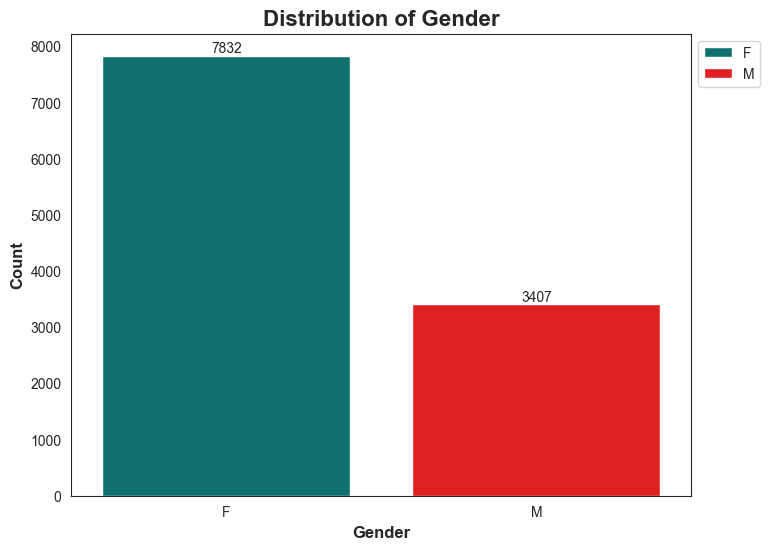

In [35]:
"""
This script creates a countplot to visualize the distribution of gender in the DataFrame.

Parameters:
- df (DataFrame): Input DataFrame containing gender data.
- gender_palette (dict): Dictionary specifying the color palette for genders.

Returns:
- None
"""

# Define a color palette for the genders
gender_palette = {'F': 'teal', 'M': 'red'}

# Set the size of the plot
plt.figure(figsize=(8, 6))
sns.set_style('white');
# Create the countplot
cp = sns.countplot(x='Gender', data=df, palette=gender_palette, hue='Gender', legend=True,)

# Add count labels to the bars
for bars in cp.containers:
    cp.bar_label(bars)


plt.title('Distribution of Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


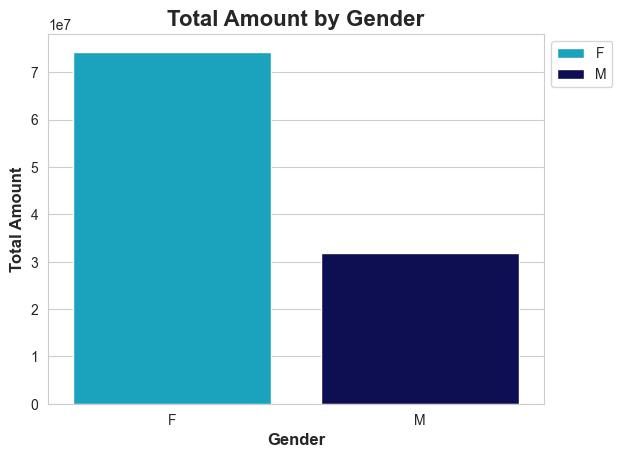

In [16]:
"""
This script creates a bar plot to visualize the total amount by gender in the DataFrame.

Parameters:
- df (DataFrame): Input DataFrame containing gender and amount data.
- gender_palette (dict): Dictionary specifying the color palette for genders.

Returns:
- None
"""

# Define a new color palette for the genders
gender_palette = {'F': '#00b4d8', 'M': '#03045e'}

# Set the style for Seaborn
sns.set_style("whitegrid")

# Grouping by gender and summing the amount
gender_groupby = df.groupby('Gender')['Amount'].sum().reset_index()

# Creating a bar plot with the premium color palette
sns.barplot(x='Gender', y='Amount', data=gender_groupby, palette=gender_palette, hue='Gender',legend=True)

# Add title and labels
plt.title('Total Amount by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Total Amount', fontsize=12, fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

***The graphs indicate that most buyers are female, and females also exhibit greater purchasing power compared to males.***

***Age Group***

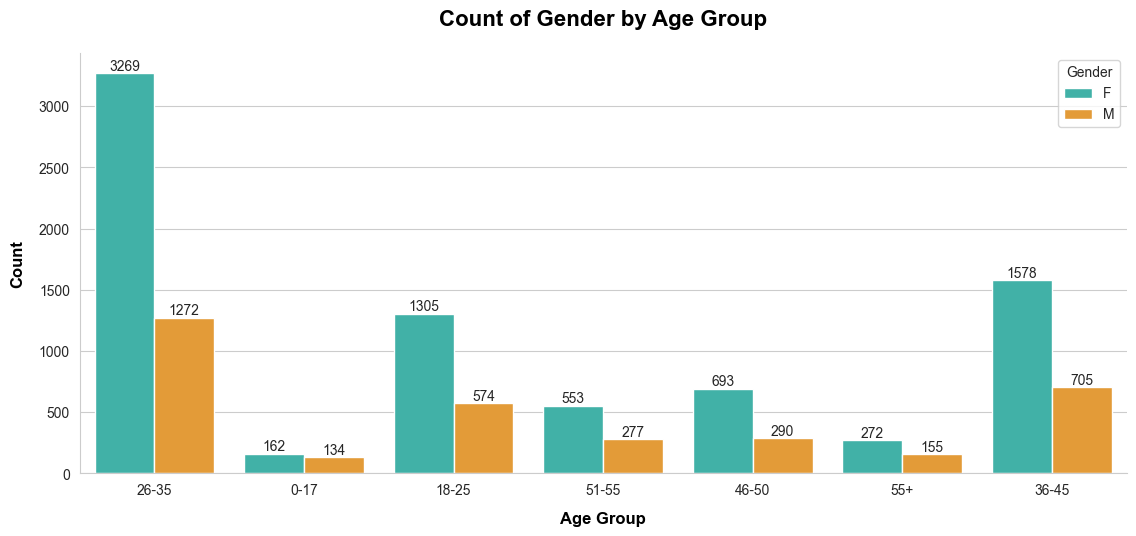

In [38]:
"""
This script creates a countplot to visualize the count of gender by age group in the DataFrame.

Parameters:
- df (DataFrame): Input DataFrame containing age group and gender data.
- age_palette (list): List of colors for the age groups.

Returns:
- None
"""


# Define a new color palette
age_palette = ['#2ec4b6', '#ff9f1c']

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Set the style for Seaborn
sns.set_style("whitegrid")

# Create the countplot
ax = sns.countplot(data=df, x='Age Group', hue='Gender', palette=age_palette, legend=True)

# Add count labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Add title and labels with custom font properties
plt.title('Count of Gender by Age Group', fontsize=16, fontweight='bold', color='black', pad=20)
plt.xlabel('Age Group', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black', labelpad=10)

# Adjust padding and spacing
plt.tight_layout(pad=3, h_pad=2, w_pad=2)

# Remove top and right spines
sns.despine()

# Show the plot
plt.show()


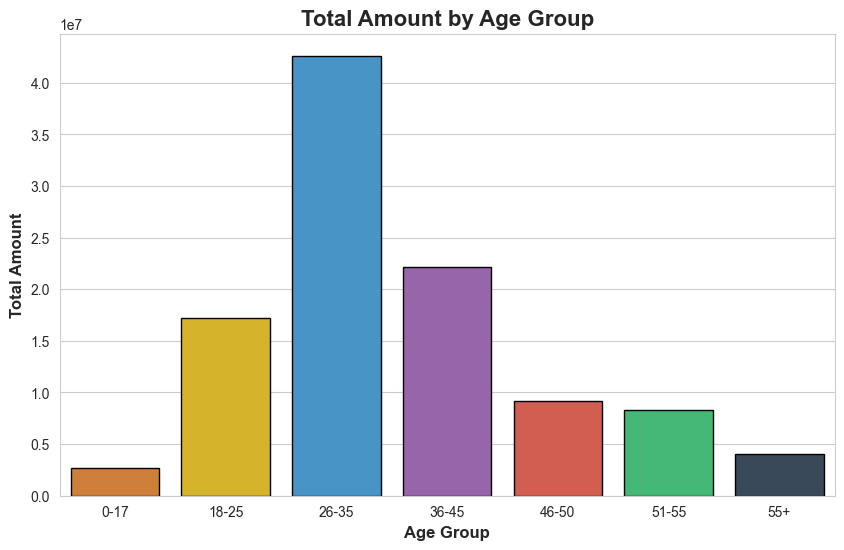

In [40]:
"""
This script creates a bar plot to visualize the total amount by age group in the DataFrame.

Parameters:
- df (DataFrame): Input DataFrame containing age group and amount data.
- age_palette (dict): Dictionary specifying the color palette for age groups.

Returns:
- None
"""



# Define a new color palette for the age groups
age_palette = {'26-35': '#3498db', '36-45': '#9b59b6', '18-25': '#f1c40f', '46-50': '#e74c3c', 
               '51-55': '#2ecc71', '55+': '#34495e', '0-17': '#e67e22'}

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Grouping by age group and summing the amount
bp = df.groupby('Age Group')['Amount'].sum().reset_index()

# Creating a bar plot with the new color palette
sns.barplot(x='Age Group', y='Amount', data=bp, palette=age_palette, hue='Age Group', dodge=False, edgecolor='black')

# Add title and labels
plt.title('Total Amount by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12, fontweight='bold')
plt.ylabel('Total Amount', fontsize=12, fontweight='bold')

# Show the plot
plt.show()



***The visualizations depict a notable trend: the predominant buyer demographic falls within the age range of 26 to 35, with a significant representation of female consumers.***

***State***

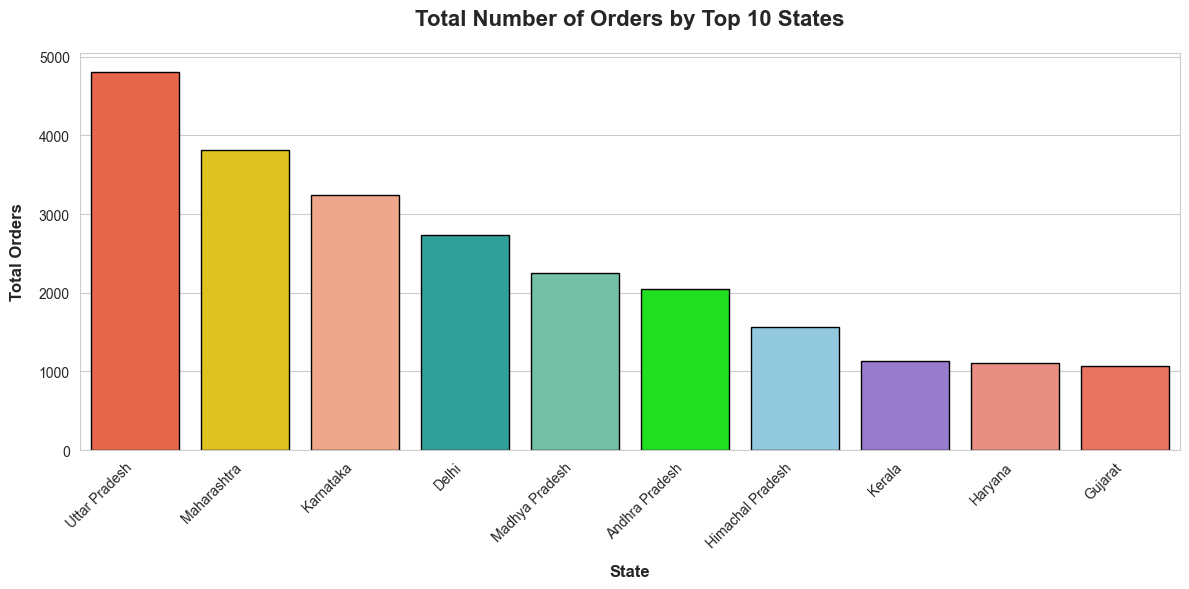

In [19]:
# Define a new color palette for the states
state_palette = ['#FF5733', '#FFD700', '#FFA07A', '#20B2AA', '#66CDAA', '#00FF00', '#87CEEB', '#9370DB', '#FA8072', '#FF6347']

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Grouping by state and summing the orders
bp = df.groupby('State')['Orders'].sum().nlargest(10).reset_index()

# Creating a bar plot with the new color palette
sns.barplot(x='State', y='Orders', data=bp, palette=state_palette, hue='State', dodge=False, edgecolor='black')

# Add title and labels
plt.title('Total Number of Orders by Top 10 States', fontsize=16, fontweight='bold',pad=20)
plt.xlabel('State', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Total Orders', fontsize=12, fontweight='bold', labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

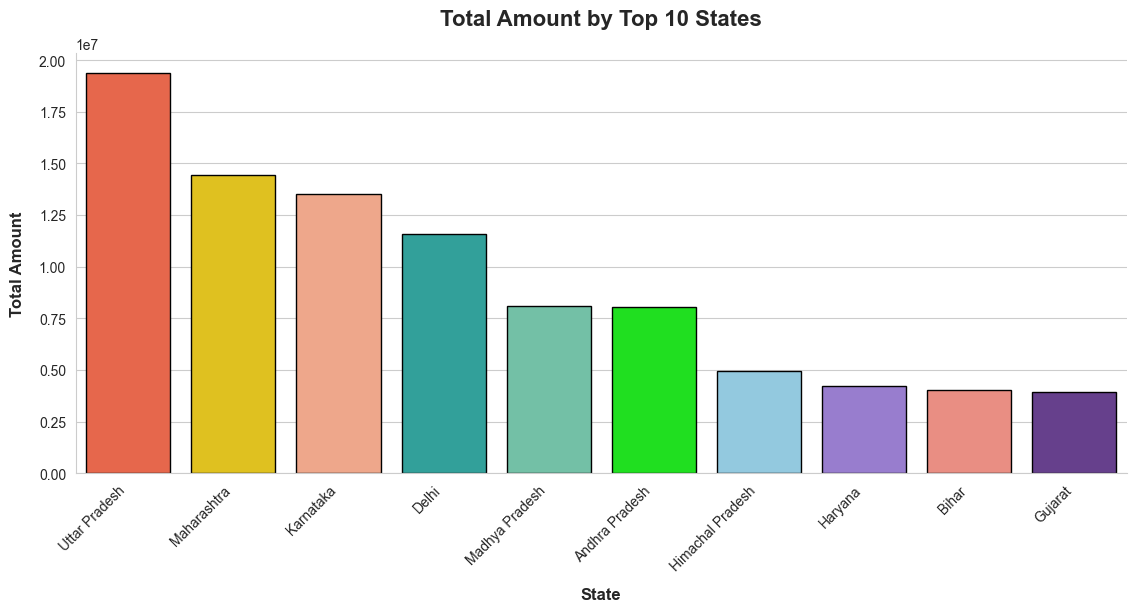

In [20]:
# Define a new color palette for the states
state_palette = ['#FF5733', '#FFD700', '#FFA07A', '#20B2AA', '#66CDAA', '#00FF00', '#87CEEB', '#9370DB', '#FA8072', '#663399']

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Grouping by state and summing the amount
sales_state = df.groupby('State')['Amount'].sum().nlargest(10).reset_index()

# Creating a bar plot with the new color palette
sns.barplot(x='State', y='Amount', data=sales_state, palette=state_palette, hue='State', dodge=False, edgecolor='black')

# Add title and labels with custom font properties
plt.title('Total Amount by Top 10 States', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('State', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Total Amount', fontsize=12, fontweight='bold', labelpad=10)

# Adjust padding and spacing
plt.tight_layout(pad=3, h_pad=2, w_pad=2)

# Remove top and right spines
sns.despine()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()


***Observing the graph above, it's apparent that the majority of orders originate from Uttar Pradesh (UP), while Maharashtra and Karnataka lead in terms of total sales volume.***

**Marital Status**

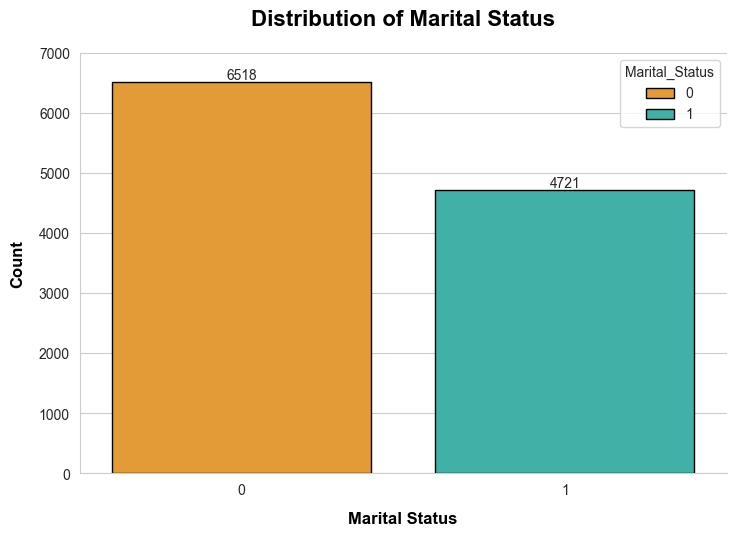

In [21]:
# Define a new color palette for the marital status
marital_palette = ['#ff9f1c', '#2ec4b6']  

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create the countplot
cp = sns.countplot(x='Marital_Status', data=df, palette=marital_palette, hue='Marital_Status', edgecolor='black')

# Add count labels to the bars
for bars in cp.containers:
    cp.bar_label(bars)

# Add title and labels with custom font properties
plt.title('Distribution of Marital Status', fontsize=16, fontweight='bold', color='black', pad=20)
plt.xlabel('Marital Status', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black', labelpad=10)

# Adjust padding and spacing
plt.tight_layout(pad=3, h_pad=2, w_pad=2)
plt.ylim(0,7000)
# Remove top and right spines
sns.despine()

# Show the plot
plt.show()

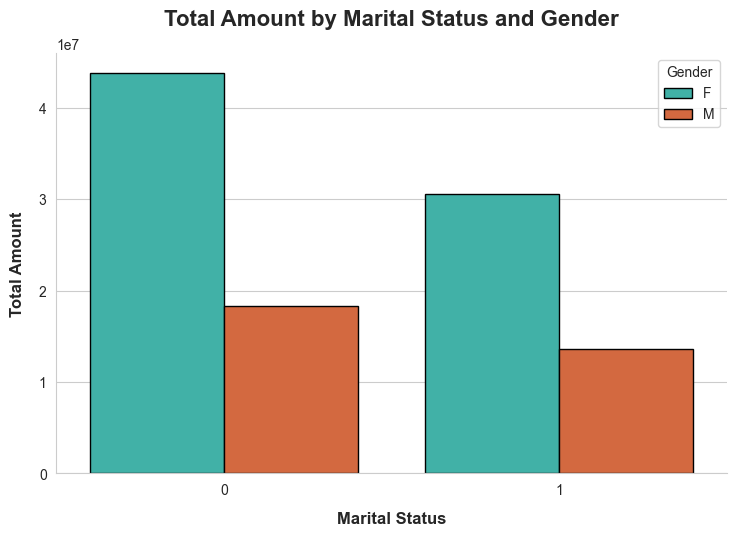

In [22]:
# Define a new color palette for the bar plot
marital_palette = ['#2ec4b6', '#eb5e28']

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Grouping by marital status and gender, and summing the amount
bp = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index()

# Creating a bar plot with the new color palette
sns.barplot(x='Marital_Status', y='Amount', data=bp, palette=marital_palette, hue='Gender', edgecolor='black')

# Add title and labels
plt.title('Total Amount by Marital Status and Gender', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Marital Status', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Total Amount', fontsize=12, fontweight='bold', labelpad=10)

# Adjust padding and spacing
plt.tight_layout(pad=3, h_pad=2, w_pad=2)

# Remove top and right spines
sns.despine()

# Show the plot
plt.show()

***From the above graph we can see that most of the buyers are married(women) and have high purchasing power***

**Occupation**

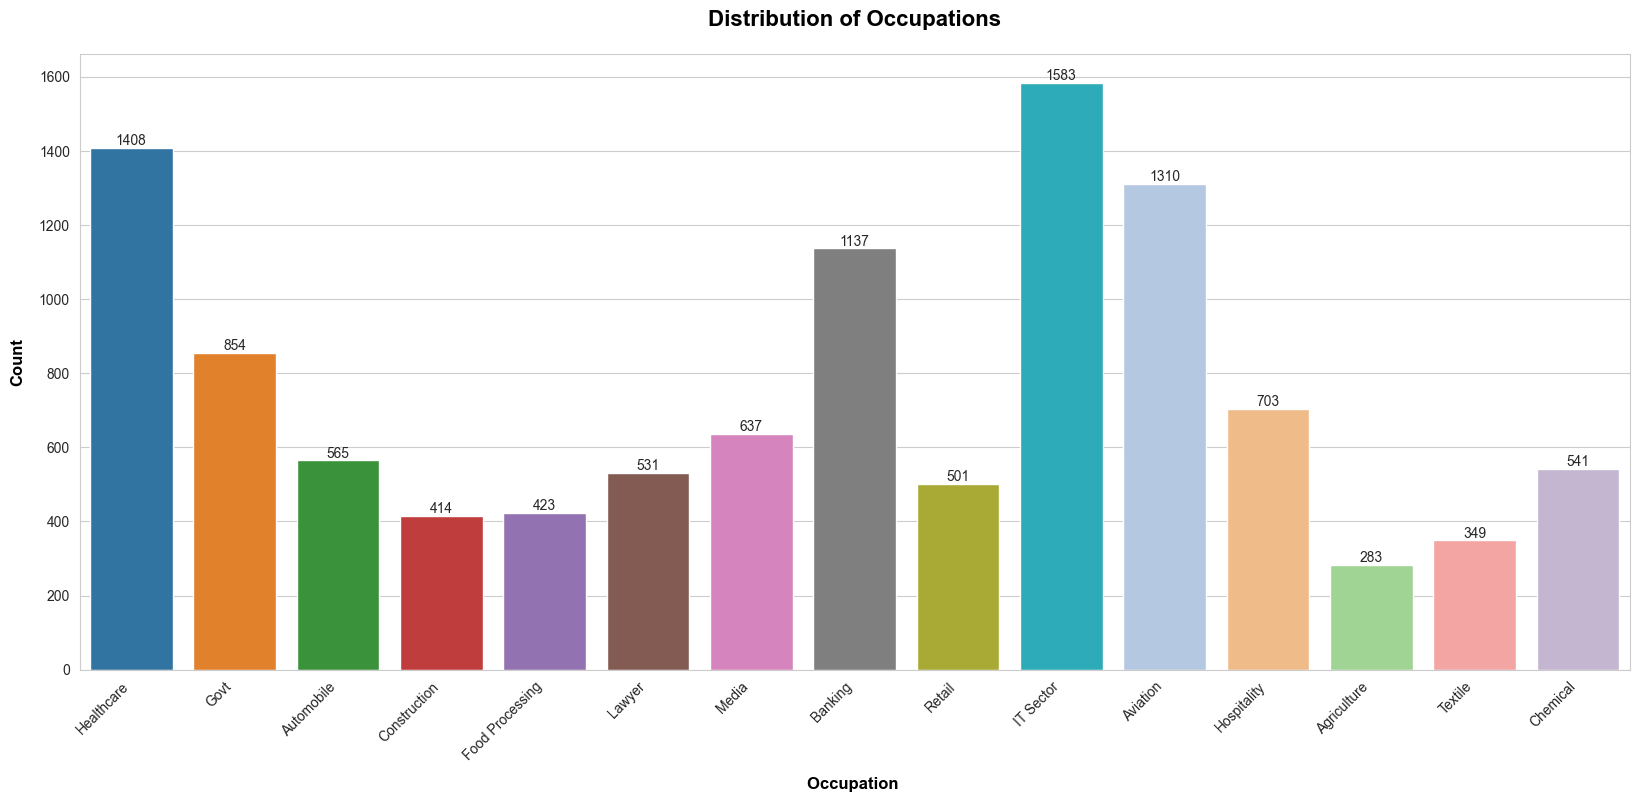

In [23]:
# Define a new color palette for the occupations
occup_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']


# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(20, 8))

# create the countplot to see the distribution of data
cp = sns.countplot(x='Occupation', data=df, palette=occup_palette, hue='Occupation', legend=False)

# add lebels to the bars
for bars in cp.containers:
  cp.bar_label(bars)

# Add title and labels with custom font properties
plt.title('Distribution of Occupations', fontsize=16, fontweight='bold', color='black', pad=20)
plt.xlabel('Occupation ', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black', labelpad=10)


plt.xticks(rotation=45, ha='right')
# Show the plot 
plt.show()

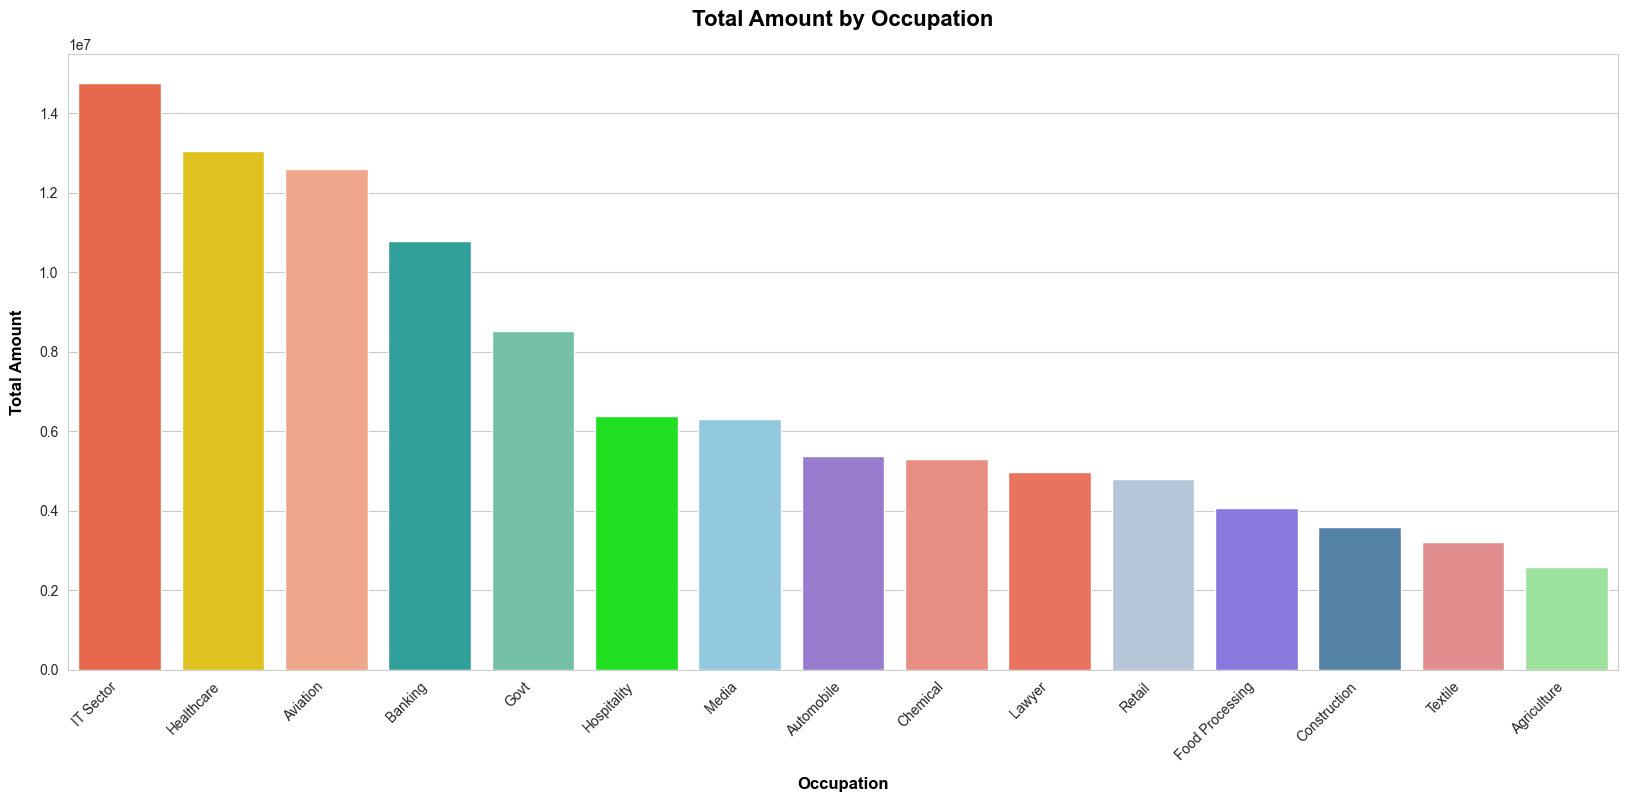

In [24]:

# Define a new color palette for the occupations
occup_palette = ['#FF5733', '#FFD700', '#FFA07A', '#20B2AA', '#66CDAA', 
                 '#00FF00', '#87CEEB', '#9370DB', '#FA8072', '#FF6347',
                 '#B0C4DE', '#7B68EE', '#4682B4', '#F08080', '#90EE90']

# Set the size of the plot
plt.figure(figsize=(20, 8))

# Grouping by occupation and summing the amount
bp = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Creating a bar plot with the defined color palette
sns.barplot(x='Occupation', y='Amount', data=bp, palette=occup_palette, hue='Occupation', legend=False)


# Add title and labels
plt.title('Total Amount by Occupation', fontsize=16, fontweight='bold', color='black', pad=20)
plt.xlabel('Occupation', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.ylabel('Total Amount', fontsize=12, fontweight='bold', color='black', labelpad=10)

# Show grid lines

plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

***From the above graphs we can see that most of buyers are woring in IT Sector, Healthcare, Aviation, repectivel***y

**Product Category**


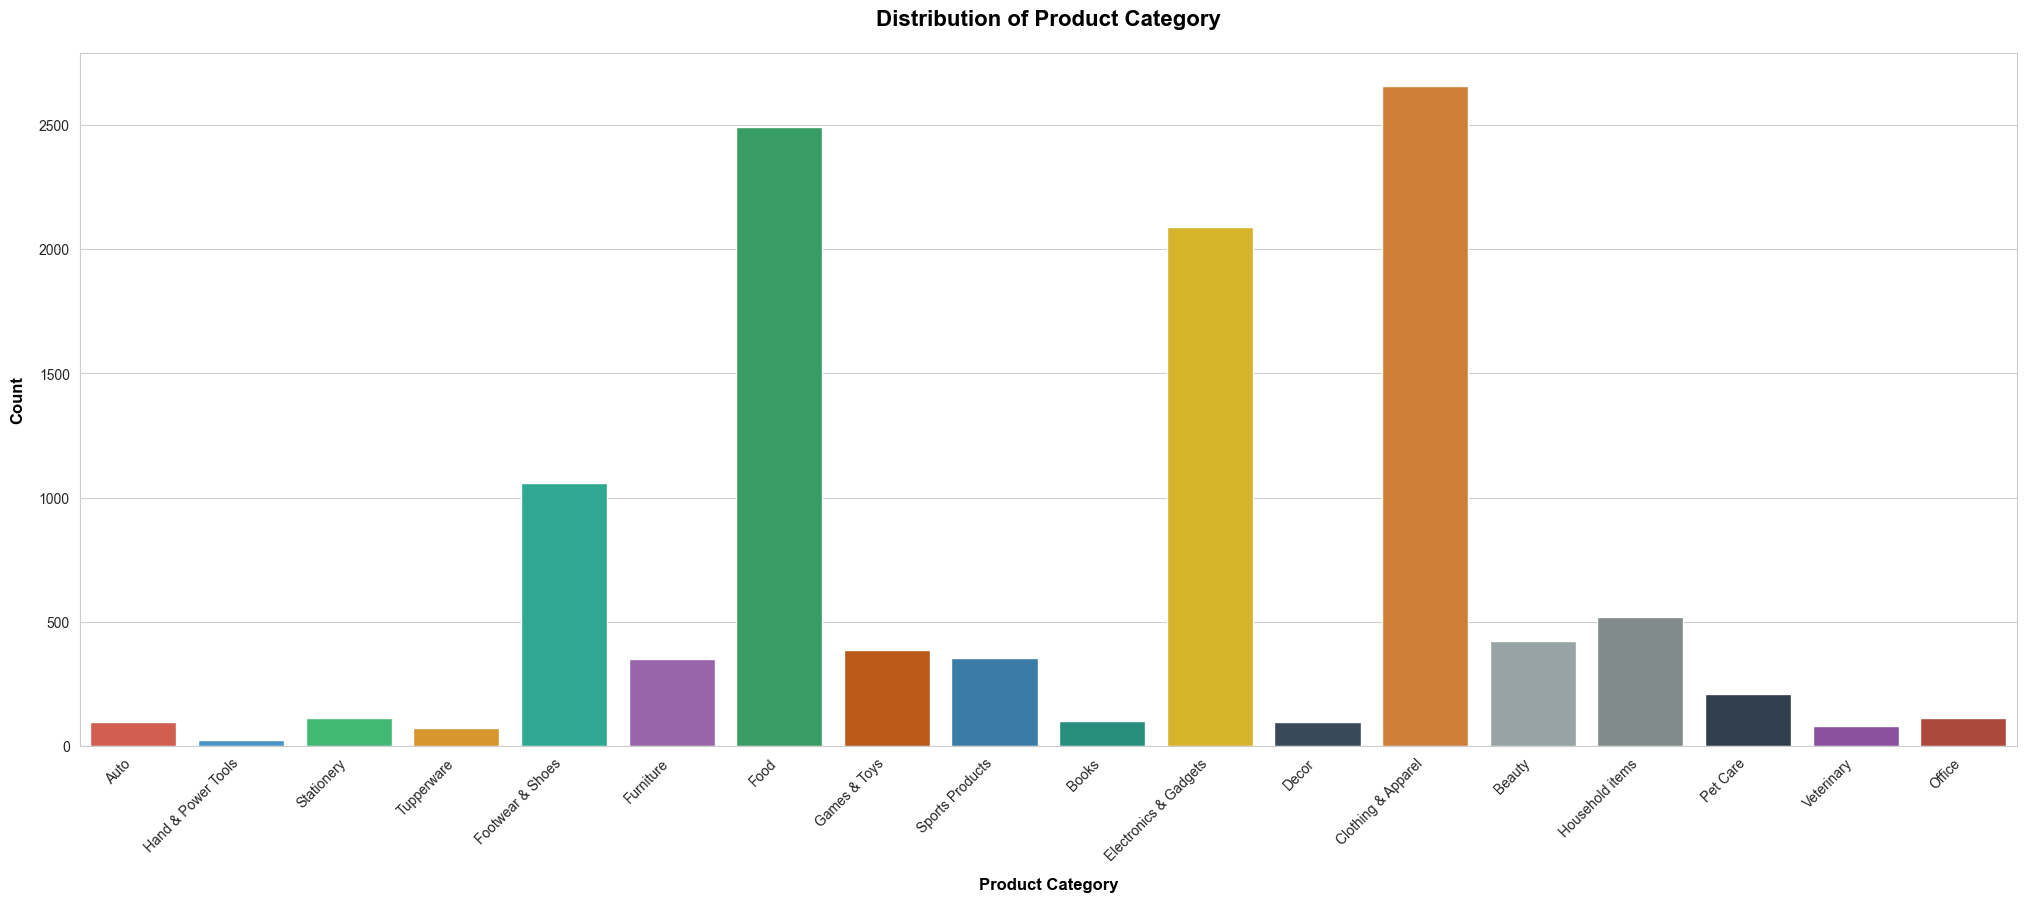

In [25]:
# Define a new color palette for the category
category_palette = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#1ABC9C', '#9B59B6', '#27AE60', 
               '#D35400', '#2980B9', '#16A085', '#F1C40F', '#34495E', '#E67E22', '#95A5A6', 
               '#7F8C8D', '#2C3E50', '#8E44AD', '#C0392B']

# Set the size of the plot
plt.figure(figsize=(25, 9))

# Create the countplot
cp = sns.countplot(x='Product_Category', data=df, palette=category_palette ,hue='Product_Category', legend=False)

# Add titles lables
plt.title('Distribution of Product Category', fontsize=16, fontweight='bold', color='black', pad=20)
plt.xlabel('Product Category', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black', labelpad=10)

plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()



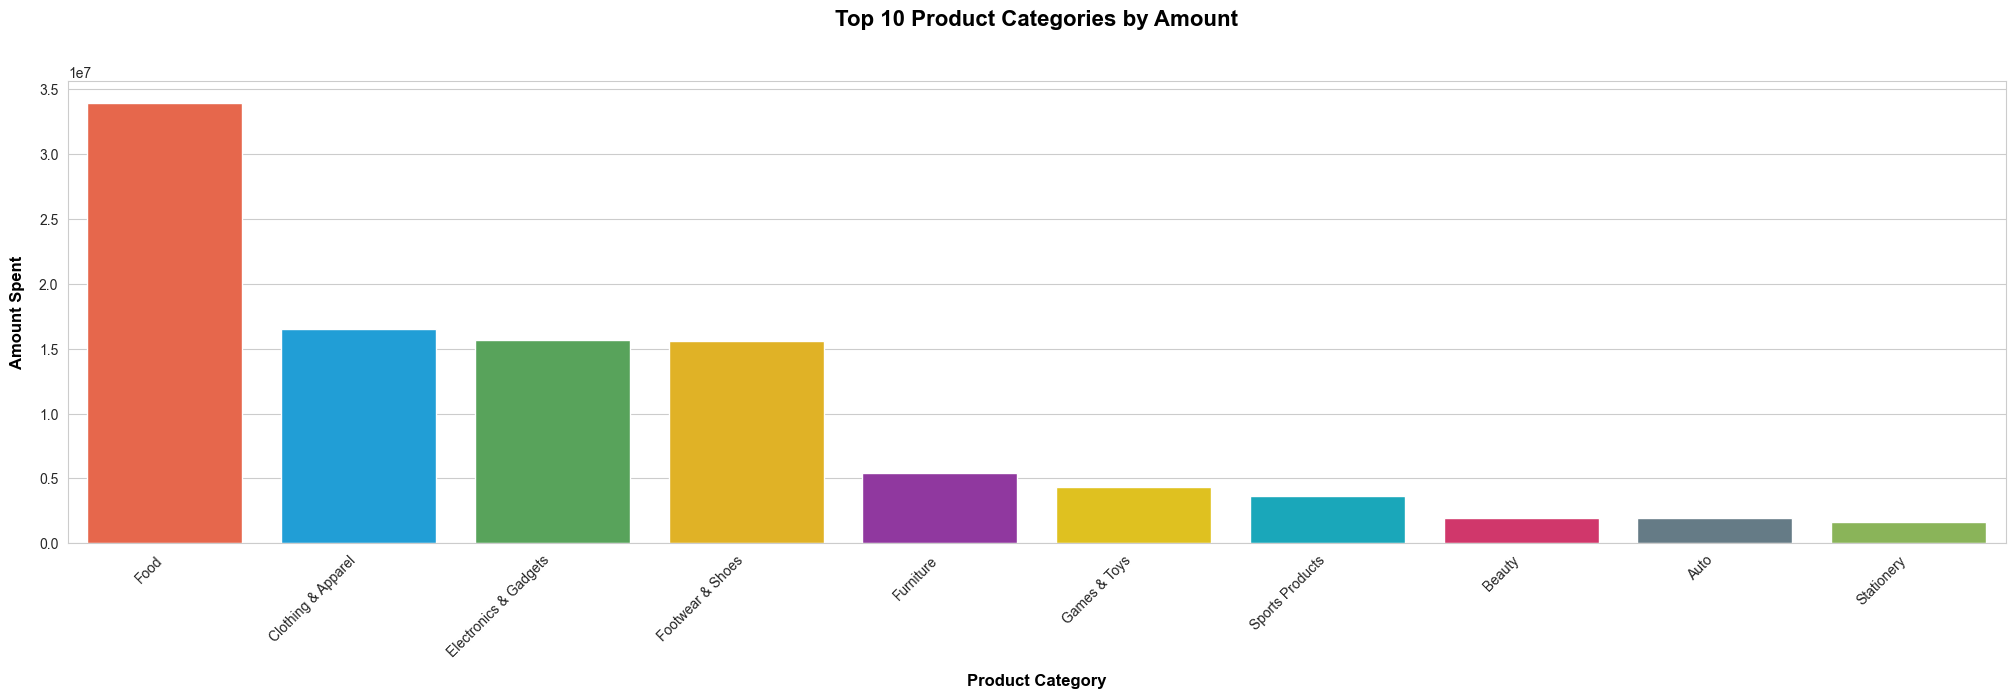

In [26]:
# Define a color palette for the category
category_palette = ['#FF5733', '#03A9F4', '#4CAF50', '#FFC107', '#9C27B0', '#FFD700', '#00BCD4', 
                       '#E91E63', '#607D8B', '#8BC34A']

# Set the size of the plot
plt.figure(figsize=(25, 6))

# Grouping by category and summing the amount
bp = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Creating a bar plot with the defined color palette
sns.barplot(x='Product_Category', y='Amount', data=bp, palette=category_palette, hue='Product_Category', legend=False)

# Add title and labels
plt.title('Top 10 Product Categories by Amount', fontsize=16, fontweight='bold', color='black', pad=40)
plt.xlabel('Product Category', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.ylabel('Amount Spent', fontsize=12, fontweight='bold', color='black', labelpad=10)

# Rotate x axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

***From the above graphs we can see that most of the sold products are Food, Clothing & Apparel , Electronocs & Gadgets, respectively***

## Conclusions

***Married women, age group 26-35 yrs from UP, Maharastra and Karnataka working in IT Sector, Healthcare and Aviation are more likely to buy products from Food,Clothing and Electronics category***